# Building a Basic Recommendation system using Weighted hybrid technique & Content based filtering

In [46]:
#Importing the libraries
import pandas as pd
import numpy as np

In [47]:
#Loading the dataset
credits = pd.read_csv("tmdb_5000_credits.csv")

C:\Users\SANJAY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,25

In [48]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [50]:
credits.head()

,movie_id,title,cast,crew,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Removing unwanted columns
credits_df=credits[['movie_id','title','cast','crew']]

In [52]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [53]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [54]:
print("Credits:",credits_df.shape)
print("Movies Dataframe:",movies_df.shape)

Credits: (4813, 4)
Movies Dataframe: (4803, 20)


In [55]:
#merging two datasets
credits_column_renamed = credits_df.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
movies_df_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,11232,"[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...",en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,11.940711,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,6.0,418,Kate & Leopold,"[{""cast_id"": 8, ""character"": ""Kate McKay"", ""cr...","[{""credit_id"": ""56263e52c3a3680e0e016e10"", ""de..."
1,48000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,1636,"[{""id"": 2038, ""name"": ""love of one's life""}, {...",en,Bedazzled,"Elliot Richardson, suicidal techno geek, is gi...",19.348007,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Meet the Devil. She's giving Elliott seven wis...,Bedazzled,5.6,512,Bedazzled,"[{""cast_id"": 5, ""character"": ""The Devil"", ""cre...","[{""credit_id"": ""52fe4307c3a36847f8034f01"", ""de..."
2,58000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",NaN,2148,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 3017, ""n...",en,The Cotton Club,The story of the people that frequented Harlem...,8.590750,"[{""name"": ""Orion Pictures"", ""id"": 41}, {""name""...",...,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was the jazz age. It was an era of elegance...,The Cotton Club,6.6,68,The Cotton Club,"[{""cast_id"": 17, ""character"": ""Dixie Dwyer"", ""...","[{""credit_id"": ""52fe433ac3a36847f80443ad"", ""de..."
3,55000000,"[{""id"": 37, ""name"": ""Western""}]",http://www.310toyumathefilm.com/,5176,"[{""id"": 1582, ""name"": ""saloon""}, {""id"": 1701, ...",en,3:10 to Yuma,"In Arizona in the late 1800's, infamous outlaw...",48.801089,"[{""name"": ""Tree Line Films"", ""id"": 84}, {""name...",...,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Time waits for one man.,3:10 to Yuma,6.9,1188,3:10 to Yuma,"[{""cast_id"": 1, ""character"": ""Ben Wade"", ""cred...","[{""credit_id"": ""52fe43fac3a36847f807b735"", ""de..."
4,48000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",http://www.taken3movie.com/,260346,"[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...",en,Taken 3,Ex-government operative Bryan Mills finds his ...,88.844777,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It Ends Here,Taken 3,6.1,2200,Taken 3,"[{""cast_id"": 3, ""character"": ""Bryan Mills"", ""c...","[{""credit_id"": ""5430413ac3a36831b5000ed5"", ""de..."


In [56]:
#Removing unwanted columns
movies_cleaned_df = movies_df_merge.drop(['homepage', 'title_x', 'title_y', 'status','production_countries'],axis=1)
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",11232,"[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...",en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,11.940711,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",12/25/2001,0,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",If they lived in the same century they'd be pe...,6.0,418,"[{""cast_id"": 8, ""character"": ""Kate McKay"", ""cr...","[{""credit_id"": ""56263e52c3a3680e0e016e10"", ""de..."
1,48000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",1636,"[{""id"": 2038, ""name"": ""love of one's life""}, {...",en,Bedazzled,"Elliot Richardson, suicidal techno geek, is gi...",19.348007,"[{""name"": ""Twentieth Century Fox Film Corporat...",10/19/2000,90383208,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Meet the Devil. She's giving Elliott seven wis...,5.6,512,"[{""cast_id"": 5, ""character"": ""The Devil"", ""cre...","[{""credit_id"": ""52fe4307c3a36847f8034f01"", ""de..."
2,58000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",2148,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 3017, ""n...",en,The Cotton Club,The story of the people that frequented Harlem...,8.590750,"[{""name"": ""Orion Pictures"", ""id"": 41}, {""name""...",12/14/1984,25928721,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",It was the jazz age. It was an era of elegance...,6.6,68,"[{""cast_id"": 17, ""character"": ""Dixie Dwyer"", ""...","[{""credit_id"": ""52fe433ac3a36847f80443ad"", ""de..."
3,55000000,"[{""id"": 37, ""name"": ""Western""}]",5176,"[{""id"": 1582, ""name"": ""saloon""}, {""id"": 1701, ...",en,3:10 to Yuma,"In Arizona in the late 1800's, infamous outlaw...",48.801089,"[{""name"": ""Tree Line Films"", ""id"": 84}, {""name...",9/6/2007,70016220,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Time waits for one man.,6.9,1188,"[{""cast_id"": 1, ""character"": ""Ben Wade"", ""cred...","[{""credit_id"": ""52fe43fac3a36847f807b735"", ""de..."
4,48000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",260346,"[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...",en,Taken 3,Ex-government operative Bryan Mills finds his ...,88.844777,"[{""name"": ""Twentieth Century Fox Film Corporat...",12/16/2014,325771424,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It Ends Here,6.1,2200,"[{""cast_id"": 3, ""character"": ""Bryan Mills"", ""c...","[{""credit_id"": ""5430413ac3a36831b5000ed5"", ""de..."


In [57]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3276 non-null   int64  
 1   genres                3276 non-null   object 
 2   id                    3276 non-null   object 
 3   keywords              3276 non-null   object 
 4   original_language     3276 non-null   object 
 5   original_title        3276 non-null   object 
 6   overview              3275 non-null   object 
 7   popularity            3276 non-null   float64
 8   production_companies  3276 non-null   object 
 9   release_date          3276 non-null   object 
 10  revenue               3276 non-null   int64  
 11  runtime               3275 non-null   float64
 12  spoken_languages      3276 non-null   object 
 13  tagline               2662 non-null   object 
 14  vote_average          3276 non-null   float64
 15  vote_count           

In [58]:
movies_cleaned_df.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  1
popularity                0
production_companies      0
release_date              0
revenue                   0
runtime                   1
spoken_languages          0
tagline                 614
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

In [59]:
# Calculate all the components based on the above formula
v=movies_cleaned_df['vote_count']
R=movies_cleaned_df['vote_average']
C=movies_cleaned_df['vote_average'].mean()
m=movies_cleaned_df['vote_count'].quantile(0.70) #it means those which has 70 percent movie count that will only be considered , other rows will be neglected.

In [60]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [61]:
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",11232,"[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...",en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,11.940711,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",12/25/2001,0,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",If they lived in the same century they'd be pe...,6.0,418,"[{""cast_id"": 8, ""character"": ""Kate McKay"", ""cr...","[{""credit_id"": ""56263e52c3a3680e0e016e10"", ""de...",6.055321
1,48000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",1636,"[{""id"": 2038, ""name"": ""love of one's life""}, {...",en,Bedazzled,"Elliot Richardson, suicidal techno geek, is gi...",19.348007,"[{""name"": ""Twentieth Century Fox Film Corporat...",10/19/2000,90383208,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Meet the Devil. She's giving Elliott seven wis...,5.6,512,"[{""cast_id"": 5, ""character"": ""The Devil"", ""cre...","[{""credit_id"": ""52fe4307c3a36847f8034f01"", ""de...",5.829999
2,58000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",2148,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 3017, ""n...",en,The Cotton Club,The story of the people that frequented Harlem...,8.590750,"[{""name"": ""Orion Pictures"", ""id"": 41}, {""name""...",12/14/1984,25928721,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",It was the jazz age. It was an era of elegance...,6.6,68,"[{""cast_id"": 17, ""character"": ""Dixie Dwyer"", ""...","[{""credit_id"": ""52fe433ac3a36847f80443ad"", ""de...",6.178604
3,55000000,"[{""id"": 37, ""name"": ""Western""}]",5176,"[{""id"": 1582, ""name"": ""saloon""}, {""id"": 1701, ...",en,3:10 to Yuma,"In Arizona in the late 1800's, infamous outlaw...",48.801089,"[{""name"": ""Tree Line Films"", ""id"": 84}, {""name...",9/6/2007,70016220,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Time waits for one man.,6.9,1188,"[{""cast_id"": 1, ""character"": ""Ben Wade"", ""cred...","[{""credit_id"": ""52fe43fac3a36847f807b735"", ""de...",6.693756
4,48000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",260346,"[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...",en,Taken 3,Ex-government operative Bryan Mills finds his ...,88.844777,"[{""name"": ""Twentieth Century Fox Film Corporat...",12/16/2014,325771424,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It Ends Here,6.1,2200,"[{""cast_id"": 3, ""character"": ""Bryan Mills"", ""c...","[{""credit_id"": ""5430413ac3a36831b5000ed5"", ""de...",6.101664


In [62]:
movie_sorted_ranking=movies_cleaned_df.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
865,The Shawshank Redemption,8205,8.5,8.383636,136.747729
2321,The Godfather,5893,8.4,8.247673,143.659698
2216,Pulp Fiction,8428,8.3,8.196062,121.463076
802,Schindler's List,4329,8.3,8.106351,104.469351
2849,Whiplash,4254,8.3,8.103243,192.528841
1278,千と千尋の神隠し,3840,8.3,8.084122,118.968562
974,The Empire Strikes Back,5879,8.2,8.060670,78.517830
1715,The Godfather: Part II,3338,8.3,8.055284,105.792936
1896,Star Wars,6624,8.1,7.981368,126.393695
537,Se7en,5765,8.1,7.964892,79.579532


C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38560 missing 

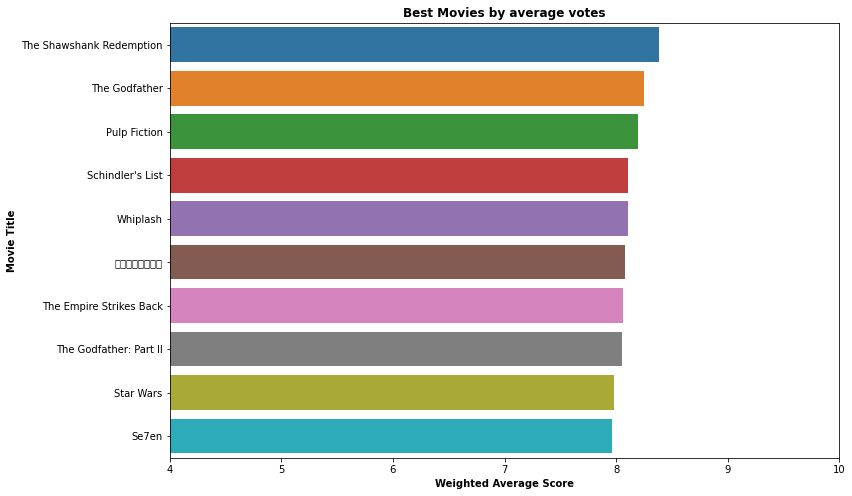

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
weight_average=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,8))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

In [64]:
movie_sorted_ranking.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
865,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",9/23/1994,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.383636
2321,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",3/14/1972,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",An offer you can't refuse.,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",8.247673
2216,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",10/8/1994,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Just because you are a character doesn't mean ...,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8.196062
802,22000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",424,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1631,...",en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",11/29/1993,321365567,195.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...","Whoever saves one life, saves the world entire.",8.3,4329,"[{""cast_id"": 14, ""character"": ""Oskar Schindler...","[{""credit_id"": ""52fe4242c3a36847f8010303"", ""de...",8.106351
2849,3300000,"[{""id"": 18, ""name"": ""Drama""}]",244786,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 1523, ""n...",en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,"[{""name"": ""Bold Films"", ""id"": 2266}, {""name"": ...",10/10/2014,13092000,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The road to greatness can take you to the edge.,8.3,4254,"[{""cast_id"": 5, ""character"": ""Andrew Neimann"",...","[{""credit_id"": ""54d5356ec3a3683ba0000039"", ""de...",8.103243


C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38560 missing 

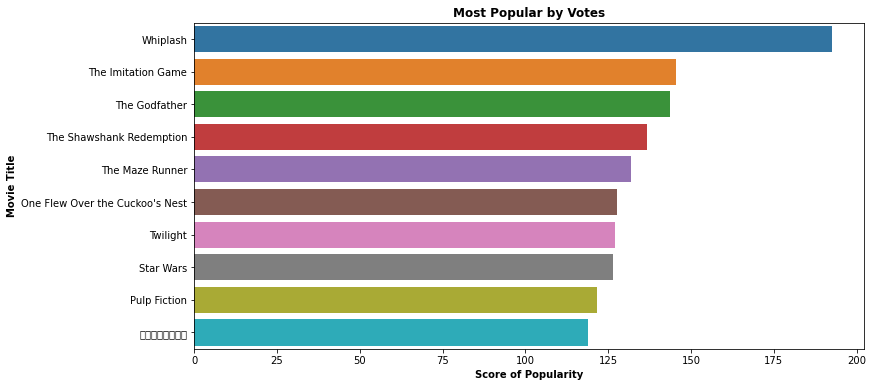

In [65]:
popularity=movie_sorted_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

# Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.411281,0.062019
1,0.354308,0.100492
2,0.442454,0.044619
3,0.572711,0.253473
4,0.422999,0.461461


In [70]:
movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [71]:
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average,normalized_weight_average,normalized_popularity
0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",11232,"[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...",en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,11.940711,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",12/25/2001,...,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",If they lived in the same century they'd be pe...,6.0,418,"[{""cast_id"": 8, ""character"": ""Kate McKay"", ""cr...","[{""credit_id"": ""56263e52c3a3680e0e016e10"", ""de...",6.055321,0.411281,0.062019
1,48000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",1636,"[{""id"": 2038, ""name"": ""love of one's life""}, {...",en,Bedazzled,"Elliot Richardson, suicidal techno geek, is gi...",19.348007,"[{""name"": ""Twentieth Century Fox Film Corporat...",10/19/2000,...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Meet the Devil. She's giving Elliott seven wis...,5.6,512,"[{""cast_id"": 5, ""character"": ""The Devil"", ""cre...","[{""credit_id"": ""52fe4307c3a36847f8034f01"", ""de...",5.829999,0.354308,0.100492
2,58000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",2148,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 3017, ""n...",en,The Cotton Club,The story of the people that frequented Harlem...,8.590750,"[{""name"": ""Orion Pictures"", ""id"": 41}, {""name""...",12/14/1984,...,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",It was the jazz age. It was an era of elegance...,6.6,68,"[{""cast_id"": 17, ""character"": ""Dixie Dwyer"", ""...","[{""credit_id"": ""52fe433ac3a36847f80443ad"", ""de...",6.178604,0.442454,0.044619
3,55000000,"[{""id"": 37, ""name"": ""Western""}]",5176,"[{""id"": 1582, ""name"": ""saloon""}, {""id"": 1701, ...",en,3:10 to Yuma,"In Arizona in the late 1800's, infamous outlaw...",48.801089,"[{""name"": ""Tree Line Films"", ""id"": 84}, {""name...",9/6/2007,...,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Time waits for one man.,6.9,1188,"[{""cast_id"": 1, ""character"": ""Ben Wade"", ""cred...","[{""credit_id"": ""52fe43fac3a36847f807b735"", ""de...",6.693756,0.572711,0.253473
4,48000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",260346,"[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...",en,Taken 3,Ex-government operative Bryan Mills finds his ...,88.844777,"[{""name"": ""Twentieth Century Fox Film Corporat...",12/16/2014,...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It Ends Here,6.1,2200,"[{""cast_id"": 3, ""character"": ""Bryan Mills"", ""c...","[{""credit_id"": ""5430413ac3a36831b5000ed5"", ""de...",6.101664,0.422999,0.461461


In [72]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
2849,Whiplash,0.929102,1.000000,0.964551
2321,The Godfather,0.965622,0.746172,0.855897
865,The Shawshank Redemption,1.000000,0.710271,0.855135
1506,The Imitation Game,0.870330,0.755027,0.812679
2216,Pulp Fiction,0.952572,0.630882,0.791727
1896,Star Wars,0.898286,0.656492,0.777389
2703,One Flew Over the Cuckoo's Nest,0.887106,0.662371,0.774739
1278,千と千尋の神隠し,0.924267,0.617925,0.771096
802,Schindler's List,0.929888,0.542616,0.736252
1715,The Godfather: Part II,0.916976,0.549490,0.733233


C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SANJAY\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38560 missing 

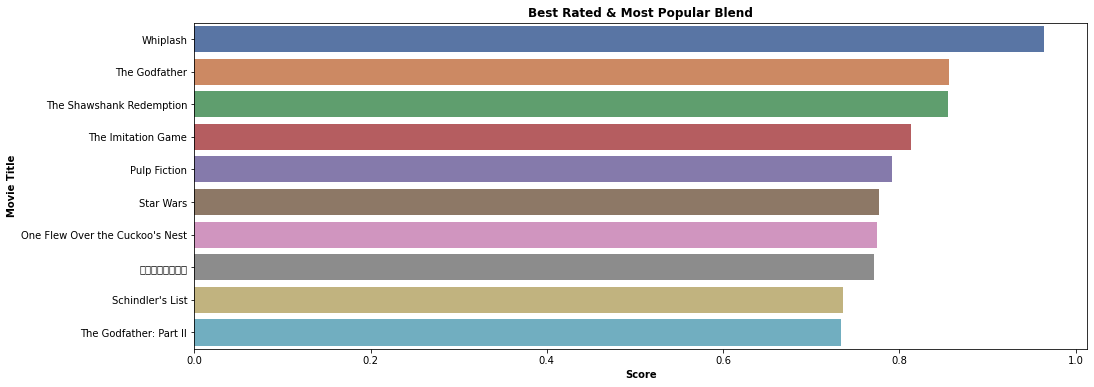

In [73]:
scored_df = movies_cleaned_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')

# Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [74]:
movies_cleaned_df.head(1)['overview']

0    When her scientist ex-boyfriend discovers a po...
Name: overview, dtype: object

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')

In [76]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [77]:
tfv_matrix.shape

(3276, 7389)

In [78]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [79]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title']).drop_duplicates()

In [80]:
indices

original_title
Kate & Leopold                  0
Bedazzled                       1
The Cotton Club                 2
3:10 to Yuma                    3
Taken 3                         4
                             ... 
El Mariachi                  3271
Newlyweds                    3272
Signed, Sealed, Delivered    3273
Shanghai Calling             3274
My Date with Drew            3275
Length: 3276, dtype: int64

In [81]:
def give_rec(title,sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [82]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Liar Liar')

293                  Heartbreakers
2007                      Rushmore
66                       16 Blocks
1941                 Brighton Rock
438                    A Good Year
562                 13 Going on 30
353                      Cape Fear
1979    Mad Max Beyond Thunderdome
1295        The Invention of Lying
1835         Max Keeble's Big Move
Name: original_title, dtype: object